## 최소제곱추정법
- 수학적으로는 반복풀이법과 최대가능추정법은 이미 같다는게 증명
  - 가우스는 최대가능도추정을 발전시켜서 LSE 방법을 만들었다

- 모수를 찾는 다른 방법
- 선형대수(행렬)

$$
  \begin{bmatrix}
    20 & 1 \\
    21 & 1 \\
    22 & 1 \\
    23 & 1 \\
    24 & 1 \\
  \end{bmatrix} \cdot
  \begin{bmatrix}
    a \\ b
  \end{bmatrix} =
  \begin{bmatrix}
    15 \\ 16 \\ 21 \\ 33 \\ 42
  \end{bmatrix}
$$


### 직접 풀이법(Direct Solve)

\begin{equation}
\begin{bmatrix}
1 & 4 & 2 & 0 \\
9 & 5 & 0 & 0 \\
4 & 0 & 2 & 4 \\
6 & 1 & 8 & 3
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\x_3\\x_4
\end{bmatrix}=
\begin{bmatrix}
15\\19\\26\\44
\end{bmatrix}
\end{equation}

- 애석하게도 이 방법으로는 우리가 원하는 결과를 찾을 수가 없습니다. 

In [ ]:
A = np.array([
  [1, 4, 2, 0],
  [9, 5, 0, 0],
  [4, 0, 2, 4],
  [6, 1, 8, 3]
])
B = np.array([15, 19, 26, 44])

- 역행렬은 있을수도 있고, 없을수도 있습니다.
- 역행렬이 있는지 어떻게 확인?
  - 판별식을 통해서 알 수 있습니다.
  - 판별식의 결과가 0이 아니면 역행렬이 존재한다고 보면 됩니다.

In [ ]:
# 파이썬의 넘파이는 간단한 명령어로 역행렬을 존재를 확인할 수 있습니다. 
np.linalg.det(A)

853.9999999999995

- 역행렬을 구해 봅니다.
- 역시 파이썬의 numpy는 간단한 명령어로 역행렬을 바로 확인해볼 수 있습니다. 

In [ ]:
invA = np.linalg.inv(A)
invA

array([[-0.15222482,  0.11241218, -0.03512881,  0.04683841],
       [ 0.27400468, -0.00234192,  0.06323185, -0.08430913],
       [ 0.02810304, -0.05152225, -0.1088993 ,  0.14519906],
       [ 0.1381733 , -0.08665105,  0.33957845, -0.11943794]])

- 역행렬을 구했으므로, y에 내적을 해주면 답을 구할 수 있습니다.
- 넘파이는 두 가지 방법으로 내적을 구할 수 있습니다. 
  - np.dot()
  - np.matmul()

In [ ]:
np.dot( invA, B )

array([1., 2., 3., 4.])

In [ ]:
np.matmul( invA, B )

array([1., 2., 3., 4.])

In [ ]:
np.linalg.solve( A, B )

array([1., 2., 3., 4.])

### 반복풀이법
- 반복풀이법의 과정을 최적화 라고 합니다. 
- ML/DL에서 얘기하는 `학습`은 반복풀이법의 과정을 의미합니다. 
- 해에 근사할 수 있는 여러가지 방법
  - Jacobi method
  - Gauss-Seidel method
  - conjugated gradient method
  - ... 
  - **Steepest Descent(최급 강하법) or Gradient Descent(경사 하강법)**
  - Newton method


#### 오차(Error)
- 손실(Loss), 비용(Cost)
- 추정된 값과 실제값 사이의 차이(잔차, 오차)

In [ ]:
x = np.array([20, 21, 22, 23, 24])
y = np.array([15, 16, 21, 33, 42])

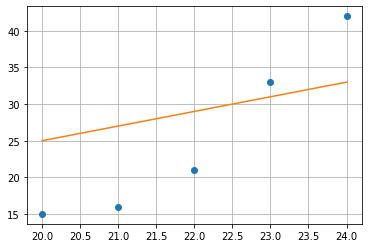

In [ ]:
plt.plot( x, y, 'o' )
plt.plot( x, 2 * x -15 )
plt.grid()
plt.show()

#### 오차에 대한 정의

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Manhattan_distance.svg/200px-Manhattan_distance.svg.png)

1. LAD(Least Absolute Deviation)
  - 최소절대오차, 최소절대잔차 등으로 직역
  - L1 loss
    - L1 norm을 사용하기 때문에 그렇습니다.
    - 주어진 점과 점 사이의 거리(맨하탄 거리)

$$
  E = \sum_{i=0}^n | y_i - \hat y_i |
$$

2. LSE(Least Squared Error/Estimation)
  - 최소제곱추정법
  - L2 loss
    - L2 norm을 사용하기 때문에 그렇습니다.
    - 주어진 점과 점 사이의 거리(유클리드 거리)

$$
  E = \sum_{i=0}^n ( y_i - \hat y_i )^2
$$

- 오차함수의 함수값이 가장 작은 모수 a, b를 찾는 문제
  - 오차함수의 함수값이 가장 작다는 것은, 예측한 값과 실제 값 사이의 차이가 가장 작았다는 의미
  - 가장 많이 사용하는 오차함수는 주로 LSE를 사용하게 되는데, LAD 방식은 미분 불가능 하기 때문에 그렇습니다. 

#### 모수를 추정하는 방법
- 한 개의 변수를 추정하는 문제로 먼저 생각
- 이때 오차함수는 아래와 같다고 가정

$$
  E(x) = x^2 - 4x + 6
$$

- 즉, 여기서 정의된 오차 함수에서는 함수값이 가장 작을 때의 x값을 구하고 싶은겁니다. 

In [ ]:
def error(x):
  return x ** 2 - 4 * x + 6

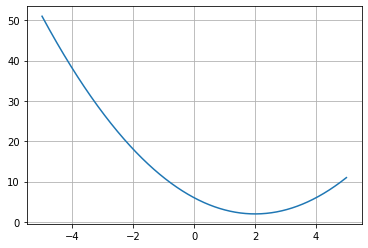

In [ ]:
x = np.linspace(-5, 5, 1000)
plt.plot( x, error(x) )
plt.grid()
plt.show()

- 함수의 모양은 이렇습니다.
- 이러한 함수를 `Convex Function` 이라고 합니다. 

##### x를 추정하는 방법 - 1
- 전부다 해보는 방법
- 모든 입력에 대한 함수값을 찾고, 그 중에서 가장 작은값을 구하면 됩니다. 

In [ ]:
y = error(x)
y # 함수값

In [ ]:
min(y)

2.0000090180270362

In [ ]:
i = np.argmin(y)         # 최소값의 인덱스를 찾고
print(x[i])              # 우리가 찾고자 하는 값
print( error( x[i] ) )   # x가 x[i]번째 값을 가질 때, 함수값이 제일 작다

1.9969969969969972
2.0000090180270362


##### x를 추정하는 방법 - 2
- 근사하는 또 다른 방법
- 경사하강법
- [미분에 대한 이해](https://colab.research.google.com/drive/18pk_U4NMNh4nQ274MDMm3xV7mp8_qdj7?usp=sharing)

- 경사하강법은 다음과 같이 정의가 됩니다.

$$
  x^{(k+1)} = x^{(k)} - \alpha \nabla f(x^{(k)})
$$

In [ ]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import sympy as sp

import matplotlib.pyplot as plt
import seaborn as sns

# 미분

## 기울기
- 1차함수는 기울이가 모두 동일하기 때문에 미분이 정의 되지 않습니다.

1차 함수의 기울기

In [ ]:
def f(x):
  return 2 * x + 30

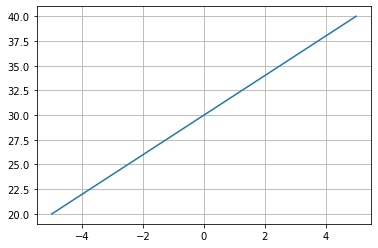

In [ ]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, f(x) )
plt.grid()
plt.show()

2차 함수의 기울기

In [ ]:
def f(x):
  return x ** 2 - 4 * x + 6

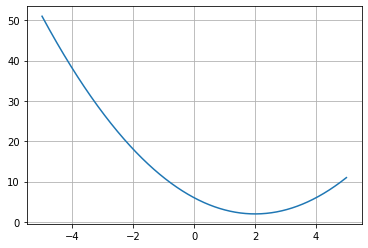

In [ ]:
x = np.linspace(-5, 5, 1000)
plt.plot(x, f(x) )
plt.grid()
plt.show()

### 평균변화율
- 특정 구간에서의 변화량
- 변화량을 측정하는 구간마다 달라진다.

$$
  \frac{\Delta y}{\Delta x} = \frac{f(x_1) - f(x_2)}{x_1 - x_2} = \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

- 순간변화율
  - 접점에서의 기울기
  - x의 변화량이 순간에 이를 정도로(점이 될때까지) 작게 줄이면 그때의 평균 변화율을 순간변화율 이라고 할 수 있겠죠
  - x의 변화량이 얼마나 작으면 순간(점)이라고 말할 수 있을까?
  - 예를 들면, 변화량이 0.00000000000000000000000000000000000001 이라면 순간이라고 말할 수 있을까?
  - x의 변화량이 아무리 작게 가져가도 오차가 생겨요
  - 우리는 순간의 변화율을 구할 수 없습니다. 


### 미분의 정의
- 극한의 개념
  - 분모를 순간에 이를 정도로 작게(극한) 만들면, 순간변화율 이라고 할 수 있습니다.
  - 즉, 극한값의 평균변화율이 순간변화율이 되는거죠
  - 이때의 변화율을 `미분계수`라고 합니다.
  - 미분계수를 함수로 하면, `도함수`라고 표현
- 순간의 변화율을 접선의 기울기 정도로 해석

$$
  f'(x) = \lim_{\Delta x \to 0} \frac{f(x + \Delta x) - f(x)}{\Delta x}
$$

In [ ]:
def f(x):
  return x ** 2 - 4 * x + 6

In [ ]:
# 변수를 기호로 변경
x = sp.Symbol('x')
f = x ** 2
display(f)
sp.diff(f, x)

x**2

2*x

In [ ]:
x = sp.Symbol('x')
f = x ** 2 - 4 * x + 6
display(f)
sp.diff(f, x)

x**2 - 4*x + 6

2*x - 4

In [ ]:
x = sp.Symbol('x')
f = x ** 2 - 4 * x + 6
F = sp.Matrix([f])
F.jacobian([x])

Matrix([[2*x - 4]])

- non-convex 함수에 대한 미분계수를 구해봅시다.

In [ ]:
x = sp.Symbol('x')
f = x * sp.sin(x)
sp.diff(f, x)

x*cos(x) + sin(x)

- 편미분 구하는 방법

In [ ]:
a, b = sp.symbols('a b')
f = (a - 2) ** 2 + (b - 2) ** 2
display( sp.diff(f, a) )
display( sp.diff(f, b) )

2*a - 4

2*b - 4

In [ ]:
a, b = sp.symbols('a b')
f = (a - 2) ** 2 + (b - 2) ** 2
F = sp.Matrix([f])
F.jacobian([a, b]).T

Matrix([
[2*a - 4],
[2*b - 4]])

아이스크림 문제에 적용할 오차함수의 미분계수를 구해 봅시다.

In [ ]:
x, y, a, b = sp.symbols('x y a b')
f = (y - (a * x + b)) ** 2
F = sp.Matrix([f])
F.jacobian([a, b]).T

Matrix([
[-2*x*(-a*x - b + y)],
[  2*a*x + 2*b - 2*y]])

In [ ]:
def error(x):
  return x ** 2 - 4 * x + 6

def grad_fx(x):
  return 2 * x - 4

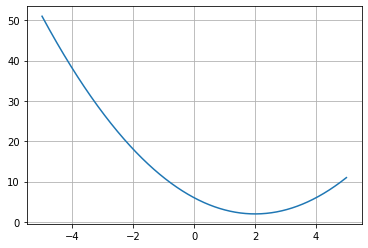

In [ ]:
x = np.linspace(-5, 5, 1000)
plt.plot( x, error(x) )
plt.grid()
plt.show()

In [ ]:
x0 = -4
lr = 0.01
maxIter = 1000
for _ in range(maxIter):
  x1 = x0 - lr * grad_fx(x0)
  # print('error: {}, grad: {}, x: {}'.format( error(x0), grad_fx(x0), x0))
  x0 = x1

In [ ]:
x0

1.9999999899021959

- 실제로 추정하려는 모수가 많아지면 최적화 과정은 눈으로 확인해볼 수 없어요
- 최적화가 잘 되고 있는지, 아닌지 알 수 있는 방법은 없습니다
- 하지만, 지금은 그려볼 수 있습니다.
  - 그릴 수 있을 때, 많이 그려보자!

In [ ]:
x0 = -4
lr = 0.01
maxIter = 1000

a = []
for _ in range(maxIter):
  a.append(x0)
  x1 = x0 - lr * grad_fx(x0)
  # print('error: {}, grad: {}, x: {}'.format( error(x0), grad_fx(x0), x0))
  x0 = x1

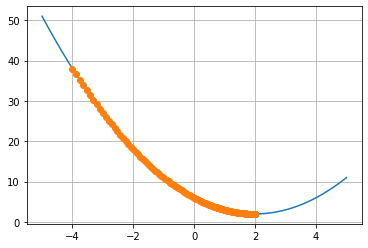

In [ ]:
a = np.array(a)
x = np.linspace(-5, 5, 1000)

plt.plot( x, error(x) )
plt.plot( a, error(a), 'o' )
plt.grid()
plt.show()

- 에러함수 확인
- 에러함수의 함수값이 정말 작아지고 있는지를 확인
  - 모수의 개수와 상관없이 확인이 가능
  - 유일하게 모형의 최적화가 잘 되었는지 확인할 수 있는 방법
  - 함수값이 작아지고 있다는 것은 결국 오차가 줄어드는 방향으로 잘 최적화가 되고 있다 라고 해석이 가능

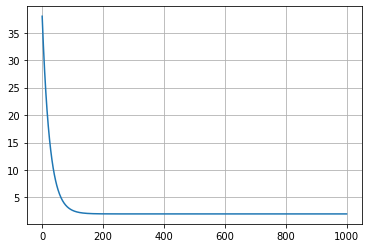

In [ ]:
plt.plot( error(a) )
plt.grid()
plt.show()

### LSE 실습
- 배운 내용을 적용해서 아이스크림 문제를 직접 풀어 봅시다.

#### 오차함수의 정의

- 선형적관계를 가정하기 때문에, 아래와 같은 모델을 정의

$$
  f(x) = ax + b + \epsilon
$$

- 세워진 모델의 오차함수는 이렇게 정의 될 수 있겠죠

$$
  E(a, b) = \sum_{i=0}^n (y_i - (ax_i + b))^2
$$

In [ ]:
x = np.array([20, 21, 22, 23, 24])
y = np.array([15, 16, 21, 33, 42])

In [ ]:
def error(a, b):
  return np.sum( np.square( y - (a * x + b) ))

def grad_fa(a, b):
  return np.sum(-2 * x * (-a * x - b + y))

def grad_fb(a, b):
  return np.sum(2 * a * x + 2 * b - 2 * y)

#### 경사하강법을 통한 최적화

In [ ]:
beta0 = np.array( [0, 0] )

lr = 0.0001
maxIter = 2000000
fval = []
for _ in range(maxIter):
  fval.append( error(*beta0) )
  grad = np.array( [ grad_fa(*beta0), grad_fb(*beta0) ] )
  beta1 = beta0 - lr * grad
  beta0 = beta1

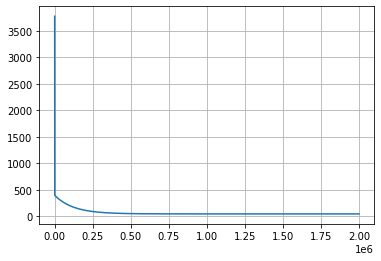

In [ ]:
plt.plot( fval )
plt.grid()
plt.show()

#### 회귀계수

In [ ]:
print( *beta0 )

7.098395141469837 -130.7645475156905


- 사이킷런의 LinearRegression을 이용했을 때와 거의 비슷한 값이 나옴을 알 수 있다.
  - 실제로 사이킷런의 LinearRegression은 최소제곱추정을 통해 모형을 적합하고 있다.
- 최대가능도추정법과도 동일한 결과 나옴을 알 수 있다. 
  - 최대가능도와 최소제곱추정은 같은 방법이다.

## 결론
- 오차함수가 convex 하다면, 최적화는 무조건 최소화 되는 방향으로 근사가 됩니다.
- 하지만, 우리가 실제 데이터에서도 오차함수가 무조건 convex 하다는 보장은 없습니다.
  - 실제로는 convex하지 않은 경우가 더 많겠죠
  - 학계에서는 모든 케이스에 대해서 전부 증명할 수 없기 때문에
  - 가장 일반화된 형태로, 잘 동작한다는 것을 증명
  - 실무에서는 해당 내용을 케이스에 반영을 할 수 있도록 응용

# 여러가지 상황
- learning rate에 따른 최적화 과정을 살펴 봅니다.

## 학습률이 아주 큰 경우

In [ ]:
x0 = -4
lr = 2
maxIter = 100

a = []
for _ in range(maxIter):
  a.append(x0)
  x1 = x0 - lr * grad_fx(x0)
  x0 = x1

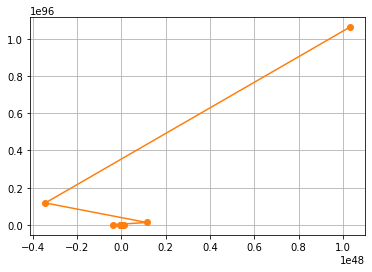

In [ ]:
a = np.array(a)
x = np.linspace(-5, 5, 1000)

plt.plot( x, error(x) )
plt.plot( a, error(a), 'o-' )
plt.grid()
plt.show()

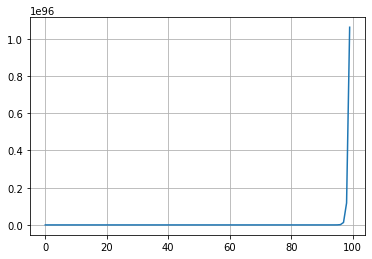

In [ ]:
plt.plot( error(a) )
plt.grid()
plt.show()

## 학습률을 조금 줄여보면

In [ ]:
x0 = -4
lr = 1
maxIter = 100

a = []
for _ in range(maxIter):
  a.append(x0)
  x1 = x0 - lr * grad_fx(x0)
  x0 = x1

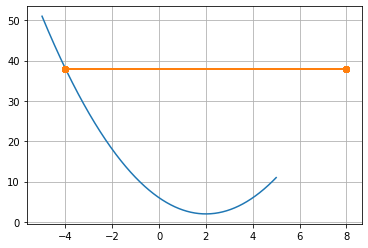

In [ ]:
a = np.array(a)
x = np.linspace(-5, 5, 1000)

plt.plot( x, error(x) )
plt.plot( a, error(a), 'o-' )
plt.grid()
plt.show()

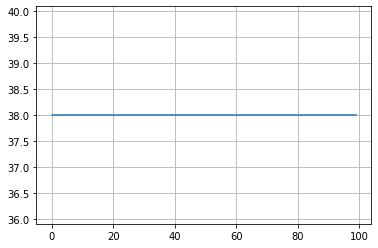

In [ ]:
plt.plot( error(a) )
plt.grid()
plt.show()

## 학습률이 더 작아지면
- 이런 경우가 가장 주의해야 되는 상황일겁니다.

In [ ]:
x0 = -4
lr = 0.9
maxIter = 100

a = []
for _ in range(maxIter):
  a.append(x0)
  x1 = x0 - lr * grad_fx(x0)
  x0 = x1

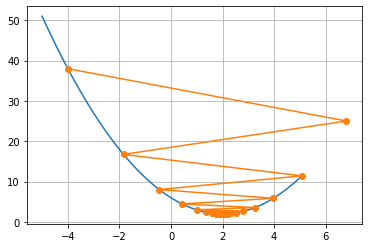

In [ ]:
a = np.array(a)
x = np.linspace(-5, 5, 1000)

plt.plot( x, error(x) )
plt.plot( a, error(a), 'o-' )
plt.grid()
plt.show()

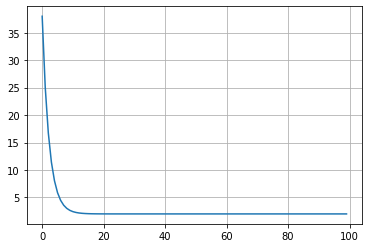

In [ ]:
plt.plot( error(a) )
plt.grid()
plt.show()

## 학습률을 더 줄여보면

In [ ]:
x0 = -4
lr = 0.5
maxIter = 100

a = []
for _ in range(maxIter):
  a.append(x0)
  x1 = x0 - lr * grad_fx(x0)
  x0 = x1

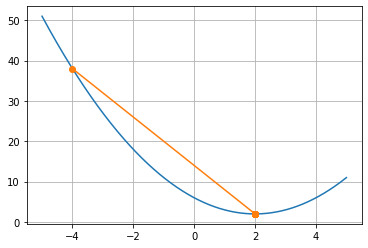

In [ ]:
a = np.array(a)
x = np.linspace(-5, 5, 1000)

plt.plot( x, error(x) )
plt.plot( a, error(a), 'o-' )
plt.grid()
plt.show()

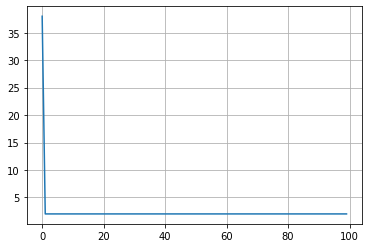

In [ ]:
plt.plot( error(a) )
plt.grid()
plt.show()

## 학습률이 아주 작아지면?

In [ ]:
x0 = -4
lr = 0.001
maxIter = 10000

a = []
for _ in range(maxIter):
  a.append(x0)
  x1 = x0 - lr * grad_fx(x0)
  x0 = x1

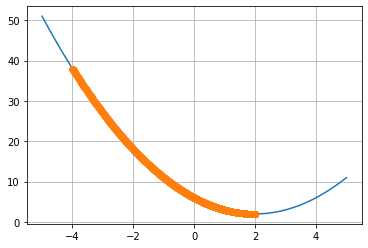

In [ ]:
a = np.array(a)
x = np.linspace(-5, 5, 1000)

plt.plot( x, error(x) )
plt.plot( a, error(a), 'o-' )
plt.grid()
plt.show()

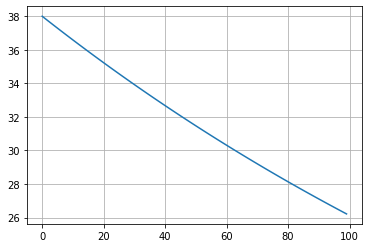

In [ ]:
plt.plot( error(a) )
plt.grid()
plt.show()

- 학습률은 학습 시간에 영향을 주게 됩니다.
  - 적당한 학습률을 찾으면 가장 빠른 시간내에 최소 지점을 찾을 수 있습니다.
  - 학습률이 너무 작으면, 그만큼 시간이 오래 걸리게 됩니다.

- 우리가 모형이 제대로 만들어졌는지 확인할 수 있는 유일한 방법은 오차함수의 그래프 밖에는 없습니다. 
  - 오차함수를 절대적으로 신뢰할 수는 없습니다.
  - 내부적으로 최적화 과정을 확인해볼 수 없습니다.
  - 그렇기 때문에 다양한 방법으로 모델을 만들어 보면서 모델에 대한 신뢰를 가질 수 있어야 합니다. 

# Non-Convex Funtion
- 여기서는 오차함수를 삼각함수로 가정해서 정의

$$
  E(x) = x \cdot sin(x)
$$

In [ ]:
def error(x):
  return x * np.sin(x)

def grad_fx(x):
  return x * np.cos(x) + np.sin(x)

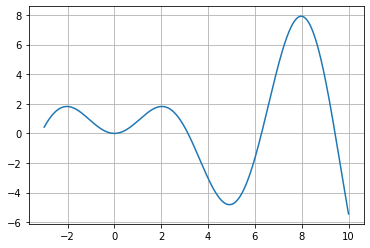

In [ ]:
x = np.linspace(-3, 10, 1000)
plt.plot( x, error(x) )
plt.grid()
plt.show()

In [ ]:
x0 = -2
lr = 0.01
maxIter = 1000

a = []
for _ in range(maxIter):
  a.append(x0)
  x1 = x0 - lr * grad_fx(x0)
  x0 = x1

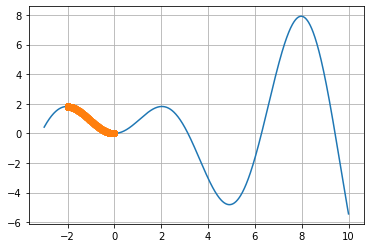

In [ ]:
x = np.linspace(-3, 10, 1000)
plt.plot( x, error(x) )
plt.plot( a, error(a), 'o-' )
plt.grid()
plt.show()

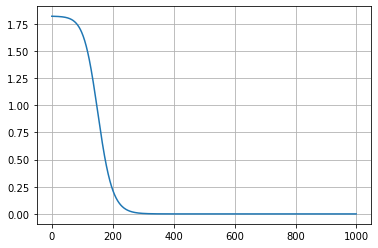

In [ ]:
plt.plot( error(a) )
plt.grid()
plt.show()

- 모수의 초기값도 모델에 영향을 줍니다.
  - 하이퍼 파라미터들(초기값, 학습율, 반복횟수, ... )을 정할 수 있는 가이드라인 또는 공식은 전혀 없습니다.

In [ ]:
x0 = 7
lr = 0.01
maxIter = 1000

a = []
for _ in range(maxIter):
  a.append(x0)
  x1 = x0 - lr * grad_fx(x0)
  x0 = x1

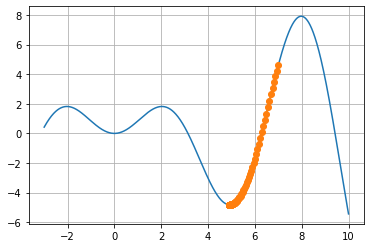

In [ ]:
x = np.linspace(-3, 10, 1000)
plt.plot( x, error(x) )
plt.plot( a, error(a), 'o-' )
plt.grid()
plt.show()

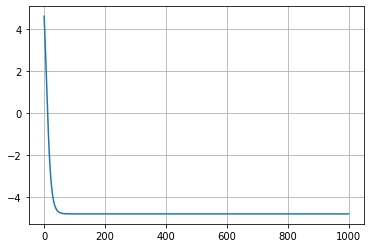

In [ ]:
plt.plot( error(a) )
plt.grid()
plt.show()

- 초기값, 반복회수 등을 잘 찾았다고 하더라도 
- 아래와 같은 경우도 발생할 수 있습니다. 

In [ ]:
x0 = 7
lr = 1
maxIter = 1000

a = []
for _ in range(maxIter):
  a.append(x0)
  x1 = x0 - lr * grad_fx(x0)
  x0 = x1

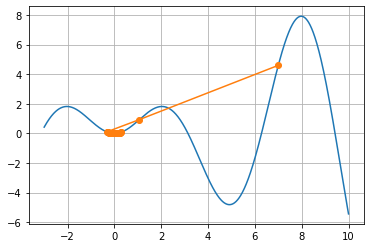

In [ ]:
x = np.linspace(-3, 10, 1000)
plt.plot( x, error(x) )
plt.plot( a, error(a), 'o-' )
plt.grid()
plt.show()

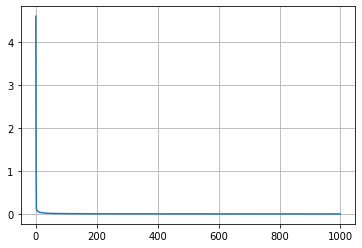

In [ ]:
plt.plot( error(a) )
plt.grid()
plt.show()

# 변수가 두 개일때 최적화
- 앞에서 처럼 가장 일반적인 형태의 함수를 오차함수로 가정

$$
  f(a, b) = (a-2)^2 + (b-2)^2
$$

## 오차함수와 기울기 함수의 정의

In [ ]:
def error(a, b):
  return (a - 2) ** 2 + (b - 2) ** 2

def grad_fa(a, b):
  return 2 * a - 4

def grad_fb(a, b):
  return 2 * b - 4

## 처음이자 마지막으로 그려보는 오차함수

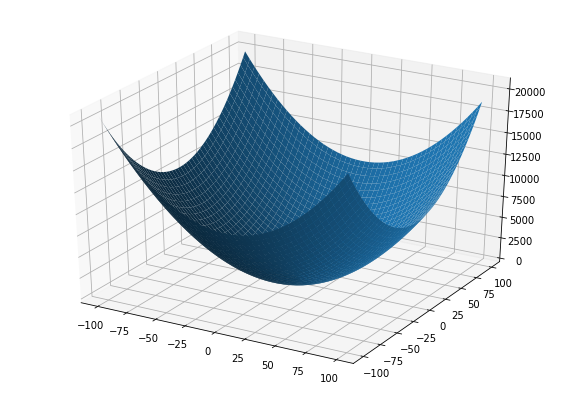

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection='3d')

xx1, xx2 = np.meshgrid(np.arange(-100, 100), np.arange(-100, 100))
z = error(xx1, xx2)
ax.plot_surface(xx1, xx2, z)
plt.show()

- 추정하려는 값이 여러개인 경우에는 기울기 벡터를 지정
- 추정하려는 모든 값이 기울기가 작아지는 방향으로 최적화가 진행

In [ ]:
beta0 = np.array( [-100, 100] )

lr = 0.001
maxIter = 1000
a = []
for _ in range(maxIter):
  a.append(beta0)
  # 기울기 벡터
  grad = np.array( [ grad_fa(*beta0), grad_fb(*beta0) ] )
  beta1 = beta0 - lr * grad
  beta0 = beta1

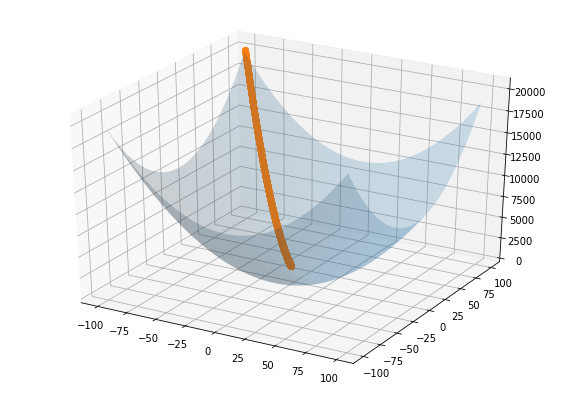

In [ ]:
fig = plt.figure(figsize = (10, 7))
ax = fig.add_subplot(projection='3d')

xx1, xx2 = np.meshgrid(np.arange(-100, 100), np.arange(-100, 100))
z = error(xx1, xx2)
ax.plot_surface(xx1, xx2, z, alpha=0.2)
ax.plot(np.array(a)[:,0], np.array(a)[:,1], error(np.array(a)[:,0], np.array(a)[:,1]), 'o-')
plt.show()

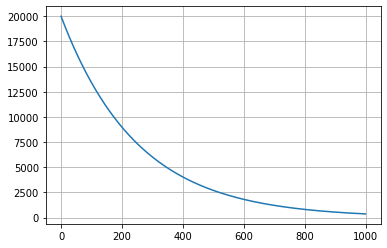

In [ ]:
plt.plot( error(np.array(a)[:,0], np.array(a)[:,1]) )
plt.grid()
plt.show()